# Project 4 :
### Applay `unsupervised learning clustring` on Tous dataset 

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

### Import Dataset

In [137]:
data = pd.read_csv('dataset.csv')

### Data Inspecting

In [171]:
print(data.info()), print(data.shape)
# As we can see below there are two object type columns, 
# and the price is one of them, 
# nevertheless the price should be float object

# there are 43 feature columns (after excluding the ID column)
# and 337 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 37 columns):
ID             337 non-null float64
best_seller    337 non-null float64
price          337 non-null int64
image          337 non-null object
bracelet       337 non-null float64
ring           337 non-null float64
necklace       337 non-null float64
earring        337 non-null float64
choker         337 non-null float64
pendant        337 non-null float64
mesh           337 non-null float64
gold           337 non-null float64
silver         337 non-null float64
white          337 non-null float64
titanium       337 non-null float64
ip             337 non-null float64
rose           337 non-null float64
steel          337 non-null float64
oxidized       337 non-null float64
mat_sum        337 non-null float64
pearl          337 non-null float64
opal           337 non-null float64
topaz          337 non-null float64
amethyst       337 non-null float64
malachite      337 non-null float6

(None, None)

In [139]:
data.sum(axis=0)
# the summetion of values for each column,
# here we notice that 7 columns summetion values are = 0 
# which means that there is no observation related to this column 

ID                                                         56616
best_seller                                                   49
price          SR485SR620SR370SR370SR1,300SR820SR820SR1,800SR...
image          ['https://cdn.tous.com/media/catalog/product/c...
bracelet                                                      63
ring                                                         119
necklace                                                      58
earring                                                       61
choker                                                        39
pendant                                                       49
mesh                                                           6
gold                                                         140
silver                                                       189
white                                                         14
titanium                                                       7
ip                       

In [140]:
print("1- Material per Item \n", data.mat_sum.describe(), "\n") 
print("2- Crystal per Item \n", data.cry_sum.describe(), "\n") 
print("3- Gemstone per Item \n", data.gem_sum.describe(), "\n")
# these three columns shows the different mix in one item
# such as different material in one item (gold, silver,.. etc)
# and different gemstones in one item  (pearl, opal,.. etc)
# and different crystals (dimond or ruby)

1- Material per Item 
 count    337.000000
mean       1.388724
std        0.636389
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: mat_sum, dtype: float64 

2- Crystal per Item 
 count    337.000000
mean       0.127596
std        0.334136
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cry_sum, dtype: float64 

3- Gemstone per Item 
 count    337.000000
mean       0.442136
std        0.559341
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: gem_sum, dtype: float64 



In [141]:
data.head()
# notice here that each time a earring flag is observed 
# it is compined with ring flag, this is due to the method used 
# to detect the item kind, using string methods to detect a substring
# and the word earring containes the word ring

,ID,best_seller,price,image,bracelet,ring,necklace,earring,choker,pendant,...,sapphires,agate,quartzite,gemstones,spinel,onyx,gem_sum,diamonds,ruby,cry_sum
0,0.0,1.0,SR485,['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,SR620,['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.0,SR370,['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,SR370,['https://cdn.tous.com/media/catalog/product/c...,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,"SR1,300",['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [142]:
data.image.iloc[0]

"['https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/2/1/211140420.jpg']"

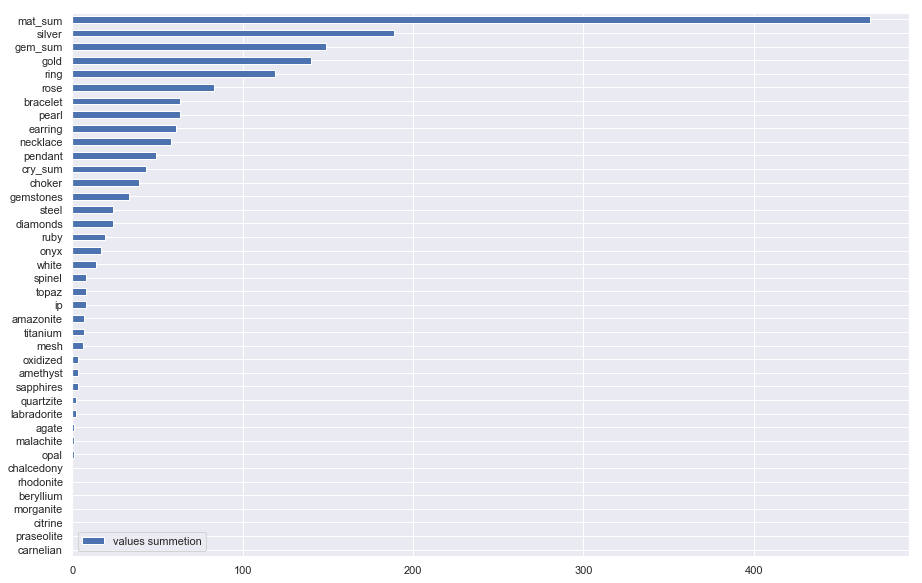

In [143]:
pd.DataFrame(data.sum(axis=0)[4:], columns=['values summetion']).sort_values(by='values summetion').plot(kind='barh',figsize=(15,10));
# notice that the ring column is the sum of rings items and earrings 
# that is why it shows almost douple the amount of the other kind items

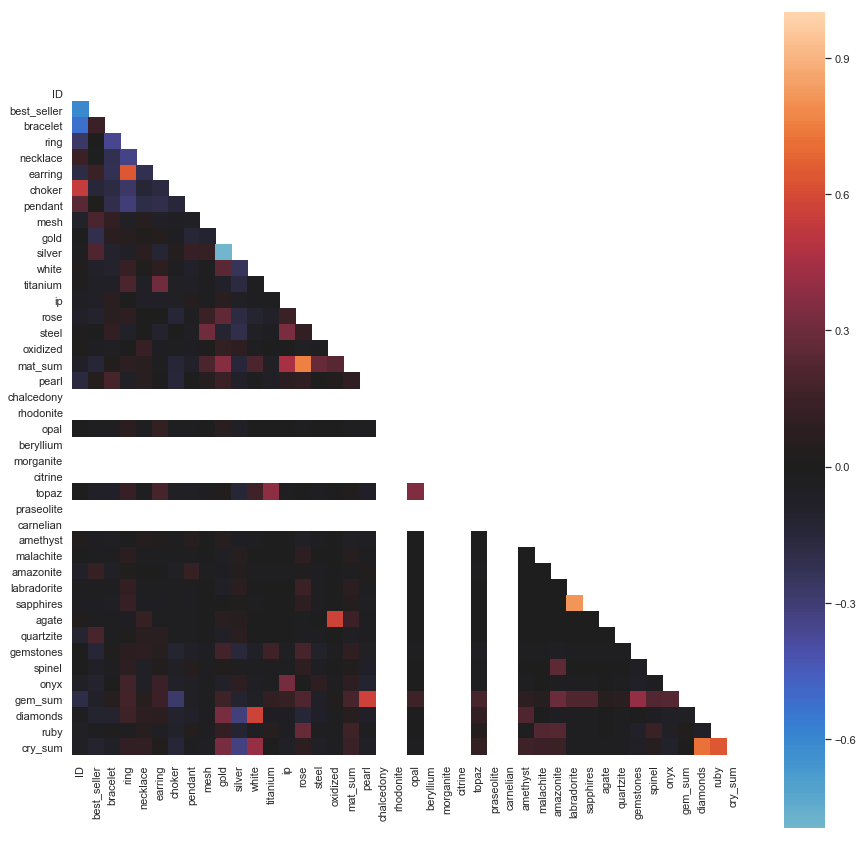

In [144]:
sns.set(rc={'figure.figsize':(15,15)})
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data.corr(), center=0, mask=mask, square=True)    
# This heat map shows the correlation between features 
# there is some intresting positive and negative relations
# and the best_seller items dose not show strong correlation 
# and the white stribes are for where the columns have no values at all 
    

## Data Cleaning

In [145]:
# 1- Changing the price column type to become numaric
## a- remove SR and comma
## b- convert to float 
data['price']= data['price'].map(lambda x : x.replace('SR','').replace(',',''))
data['price'] = pd.to_numeric(data['price'])
print(data['price'])

0       485
1       620
2       370
3       370
4      1300
5       820
6       820
7      1800
8       370
9       370
10      485
11      650
12      790
13      790
14      320
15      320
16      320
17      410
18      620
19      410
20      410
21      410
22      410
23      410
24      410
25      320
26      370
27      370
28      650
29      320
       ... 
307     650
308    1100
309     570
310     570
311    2700
312    1500
313    1800
314     265
315     210
316     175
317     115
318    3600
319    3600
320    2200
321    1900
322     210
323     695
324     485
325     485
326     265
327     159
328     159
329     139
330     455
331     265
332    1500
333    1700
334     239
335     650
336     265
Name: price, Length: 337, dtype: int64


In [146]:
# 2- Delete the unnessessarly columns 
for column in data.columns:
    if data[column].sum(axis=0)==0:
        data.pop(column)
data.sum(axis=0), data.shape

(ID                                                         56616
 best_seller                                                   49
 price                                                     383258
 image          ['https://cdn.tous.com/media/catalog/product/c...
 bracelet                                                      63
 ring                                                         119
 necklace                                                      58
 earring                                                       61
 choker                                                        39
 pendant                                                       49
 mesh                                                           6
 gold                                                         140
 silver                                                       189
 white                                                         14
 titanium                                                       7
 ip       

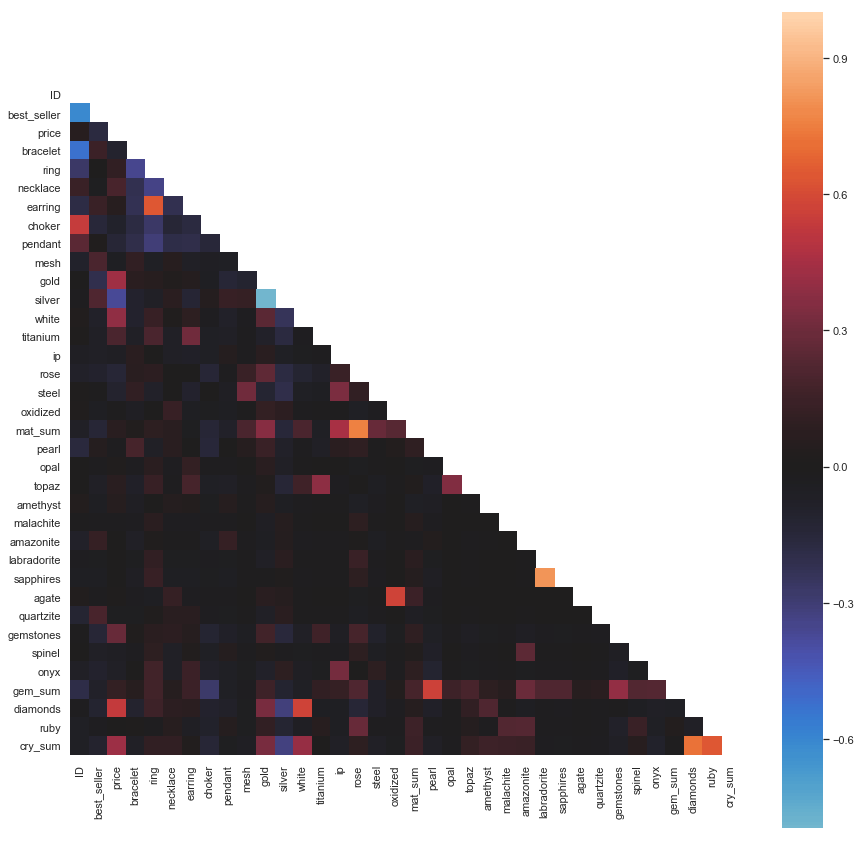

In [147]:
## inspecting the data correlation again 
sns.set(rc={'figure.figsize':(15,15)})
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data.corr(), center=0, mask=mask, square=True)
# There is strong correlation between the ring and the earring 
# becuse the word earring contains the word ring 

In [148]:
# Remove the correlation between ring and earring 
for i in range(len(data)):
    if data.earring.iloc[i]==1:
        data.ring.iloc[i]=0    

/Users/aseel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


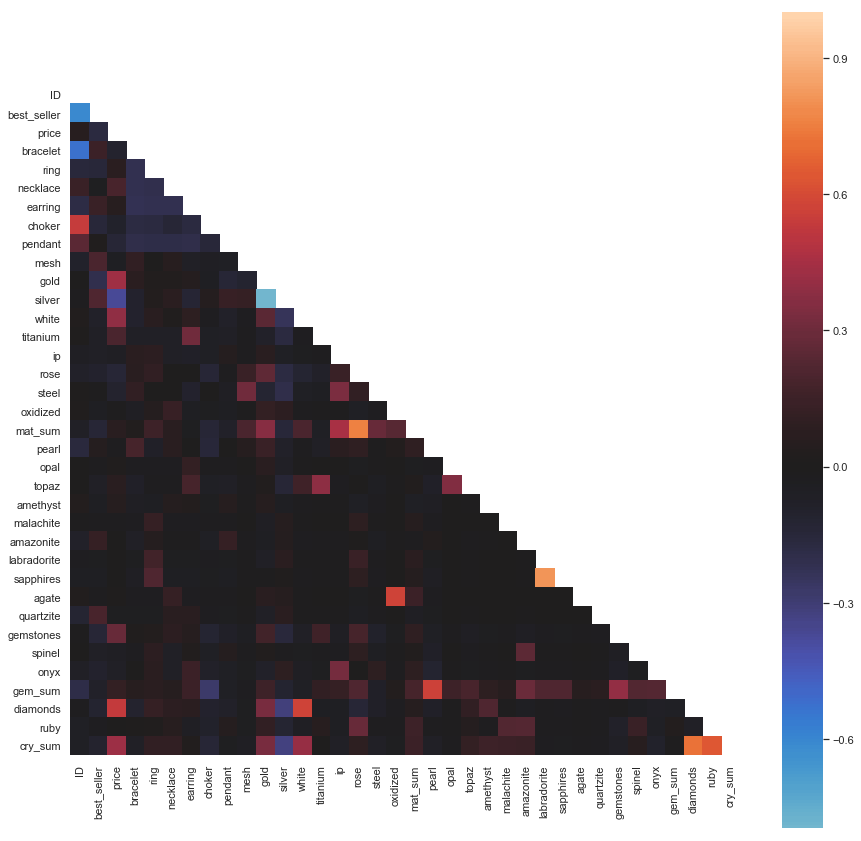

In [149]:
## inspecting the data correlation again 
sns.set(rc={'figure.figsize':(15,15)})
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data.corr(), center=0, mask=mask, square=True)   

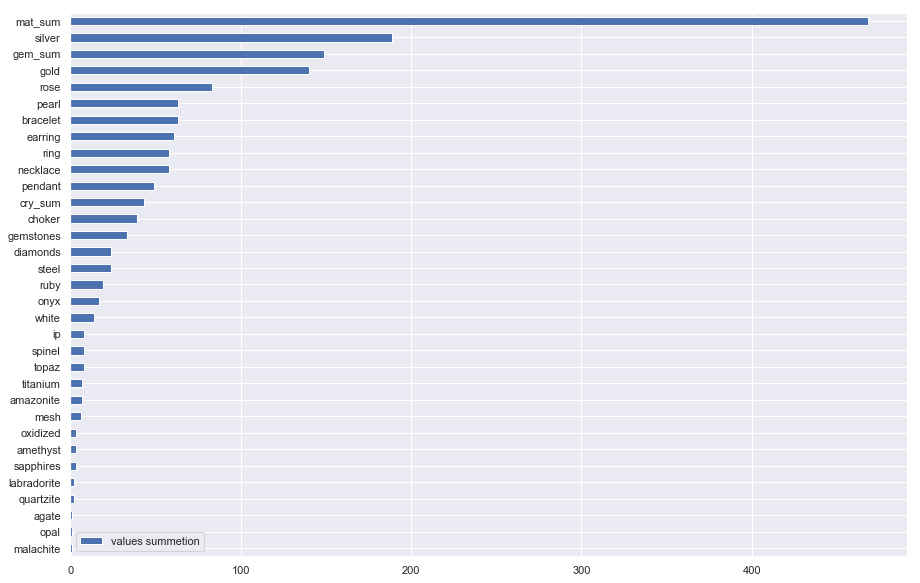

In [150]:
## inspecting again 
pd.DataFrame(data.sum(axis=0)[4:], columns=['values summetion']).sort_values(by='values summetion').plot(kind='barh',figsize=(15,10));
# notice how the ring moved from the top 5 

In [151]:
# y = pd.Series(data.sum(axis=0)[4:])
# sns.catplot(y=y, kind="count", palette="ch:.25", data=data);

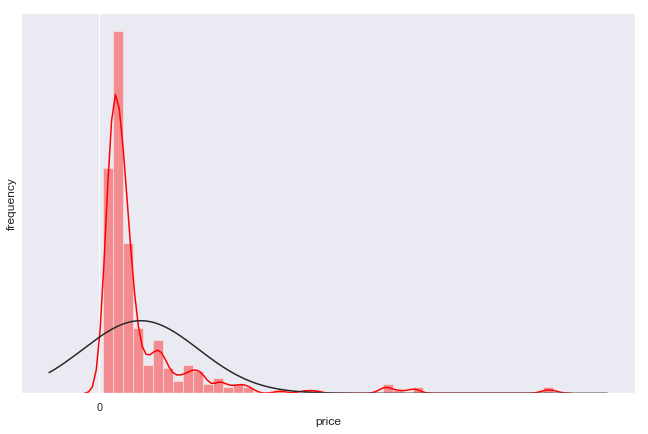

In [152]:
data_v = data[data.price < 120000] 
plt.figure(figsize=[11,7])
plt.xticks(np.arange(0, 10000, step=10000)) #
plt.yticks([]) # removes yticks
plt.ylabel('frequency')
sns.distplot(data_v.price, fit=norm, color= 'red', bins=45);

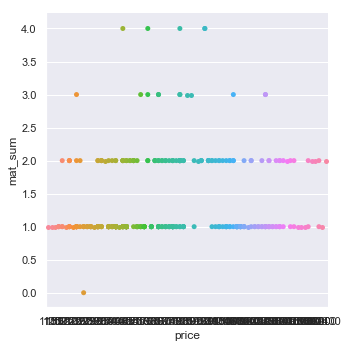

In [153]:
sns.catplot(x="price", y="mat_sum", jitter=False, data=data);
# the range of price reatches to 12K riyal 

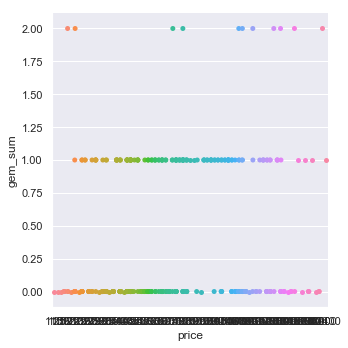

In [154]:
sns.catplot(x="price", y="gem_sum", jitter=True, data=data);

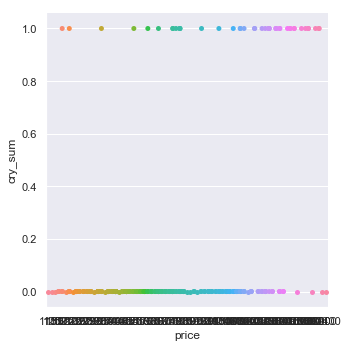

In [155]:
sns.catplot(x="price", y="cry_sum", jitter=True, data=data);

In [156]:
data.describe()

,ID,best_seller,price,bracelet,ring,necklace,earring,choker,pendant,mesh,...,sapphires,agate,quartzite,gemstones,spinel,onyx,gem_sum,diamonds,ruby,cry_sum
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,168.000000,0.145401,1137.264095,0.186944,0.172107,0.172107,0.181009,0.115727,0.145401,0.017804,...,0.008902,0.002967,0.005935,0.097923,0.023739,0.050445,0.442136,0.071217,0.056380,0.127596
std,97.427751,0.353028,1581.781216,0.390446,0.378035,0.378035,0.385598,0.320373,0.353028,0.132436,...,0.094070,0.054473,0.076922,0.297652,0.152461,0.219187,0.559341,0.257569,0.230997,0.334136
min,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,0.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168.000000,0.000000,620.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,252.000000,0.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,336.000000,1.000000,12400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


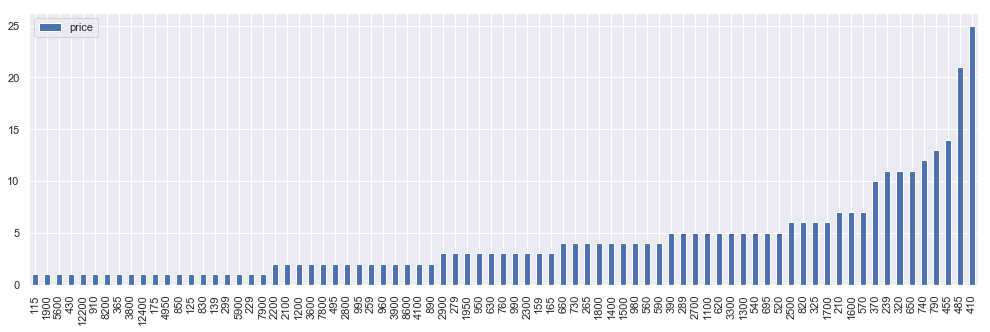

In [157]:
pd.DataFrame(data['price'].value_counts()).sort_values(by='price').plot(kind='bar', figsize=(17,5))

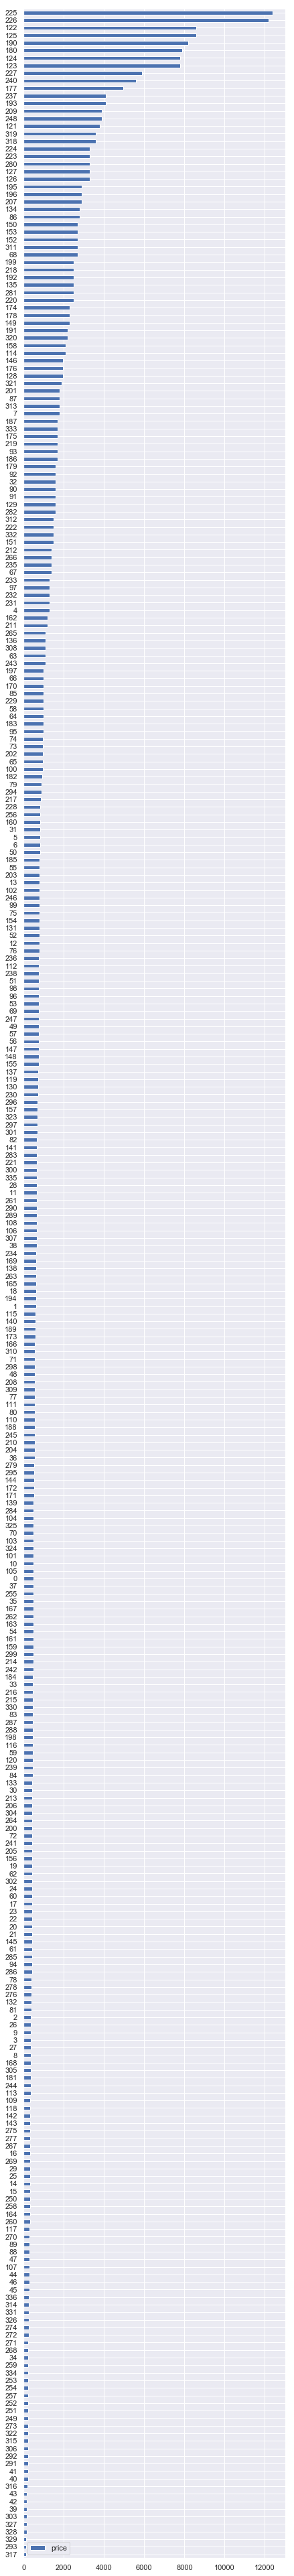

In [158]:
pd.DataFrame(data['price']).sort_values(by='price').plot(kind='barh', figsize=(7,70))

In [159]:
data.columns

Index(['ID', 'best_seller', 'price', 'image', 'bracelet', 'ring', 'necklace',
       'earring', 'choker', 'pendant', 'mesh', 'gold', 'silver', 'white',
       'titanium', 'ip', 'rose', 'steel', 'oxidized', 'mat_sum', 'pearl',
       'opal', 'topaz', 'amethyst', 'malachite', 'amazonite', 'labradorite',
       'sapphires', 'agate', 'quartzite', 'gemstones', 'spinel', 'onyx',
       'gem_sum', 'diamonds', 'ruby', 'cry_sum'],
      dtype='object')

## Recommendation System

In [177]:
from sklearn.preprocessing import normalize
n_data = normalize(data.loc[:, 'bracelet':])

In [178]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(n_data, n_data)

In [179]:
f_data = pd.DataFrame(cosine_sim)
f_data.set_index(data.image, inplace=True)
f_data.columns=data.image

In [180]:
cosine_sim[:5,:5]

array([[1.        , 1.        , 0.77459667, 0.51639778, 0.8       ],
       [1.        , 1.        , 0.77459667, 0.51639778, 0.8       ],
       [0.77459667, 0.77459667, 1.        , 0.66666667, 0.51639778],
       [0.51639778, 0.51639778, 0.66666667, 1.        , 0.25819889],
       [0.8       , 0.8       , 0.51639778, 0.25819889, 1.        ]])

In [181]:
def top6(ID):
    return f_data.loc[ID].sort_values(ascending=False)[:6]

In [182]:
images =top6("['https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/2/1/211140420.jpg']")

In [183]:
# type(images)

In [184]:
import re

In [185]:
ims = [re.search("https.+\.jpg",x).group() for x in list(images.index)]

In [186]:
# img=Image.open(ims[2])
# img.show()

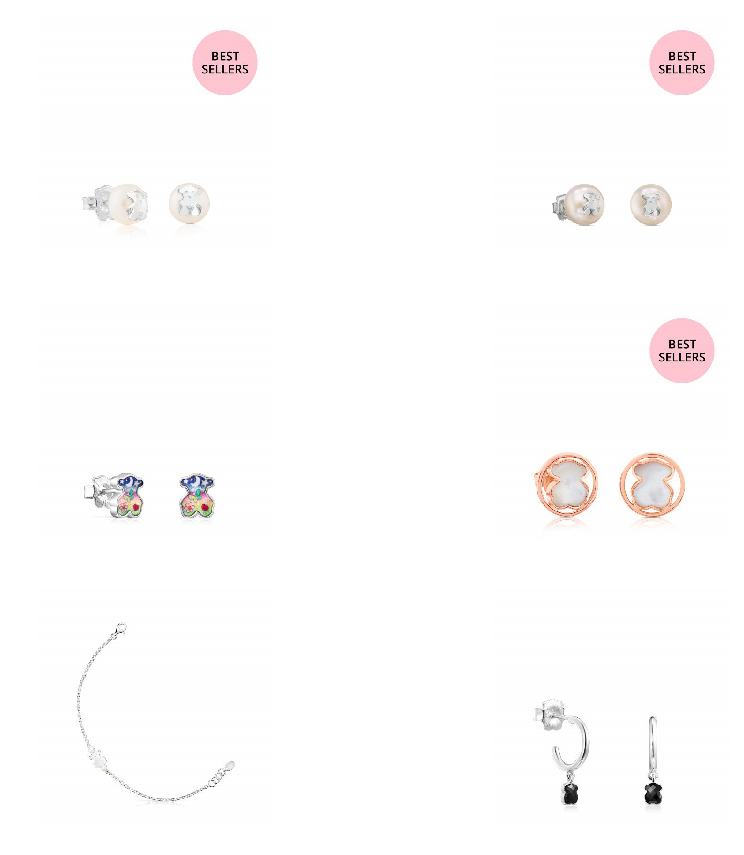

In [187]:
from PIL import Image
import requests
from io import BytesIO

plt.subplots(3,2)

for i, im in enumerate(ims):
    response = requests.get(im)
    img = Image.open(BytesIO(response.content))
    plt.subplot(3,2,i+1)
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.grid(False)
    plt.imshow(img)

plt.show()

In [188]:
# # %pylab inline
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img=mpimg.imread(image)
# imgplot = plt.imshow(img)
# plt.show()

https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/2/1/211140420.jpg
https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/4/1/411143500.jpg
https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/9/1/918573580.jpg
https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/7/1/712163570.jpg
https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/8/1/812451570.jpg
https://cdn.tous.com/media/catalog/product/cache/image/512x512/9df78eab33525d08d6e5fb8d27136e95/9/1/918453530.jpg


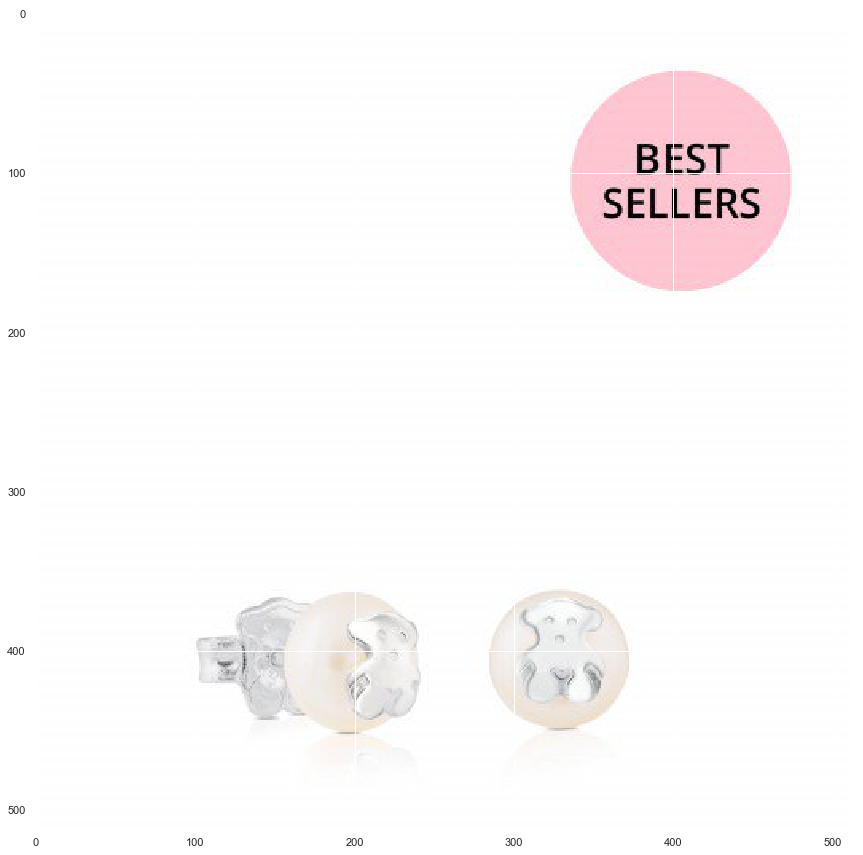

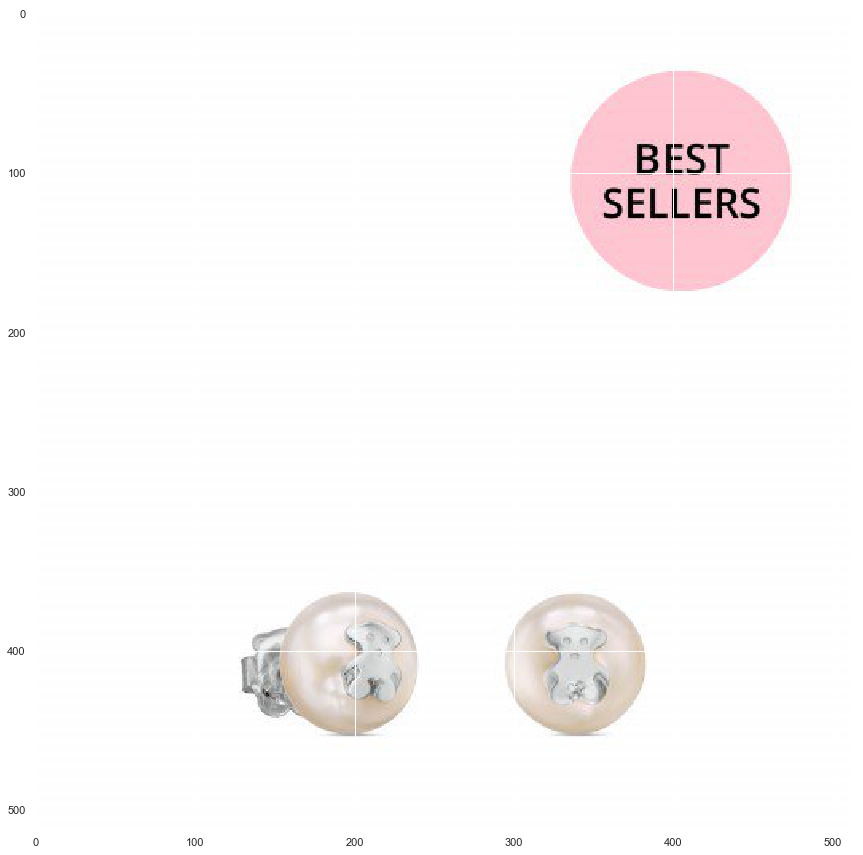

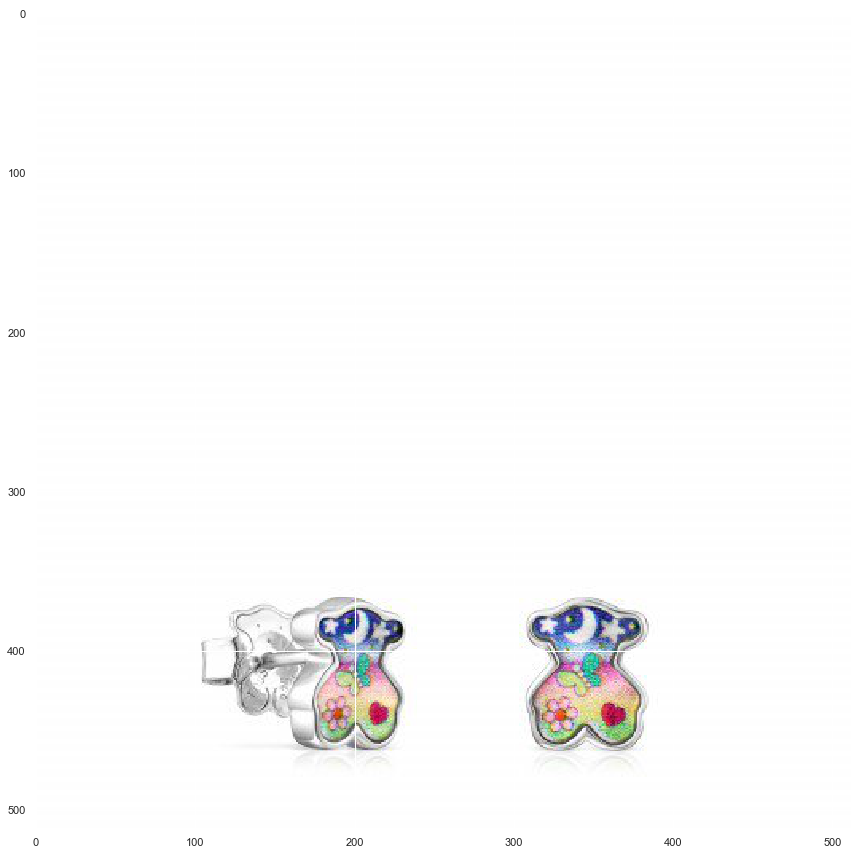

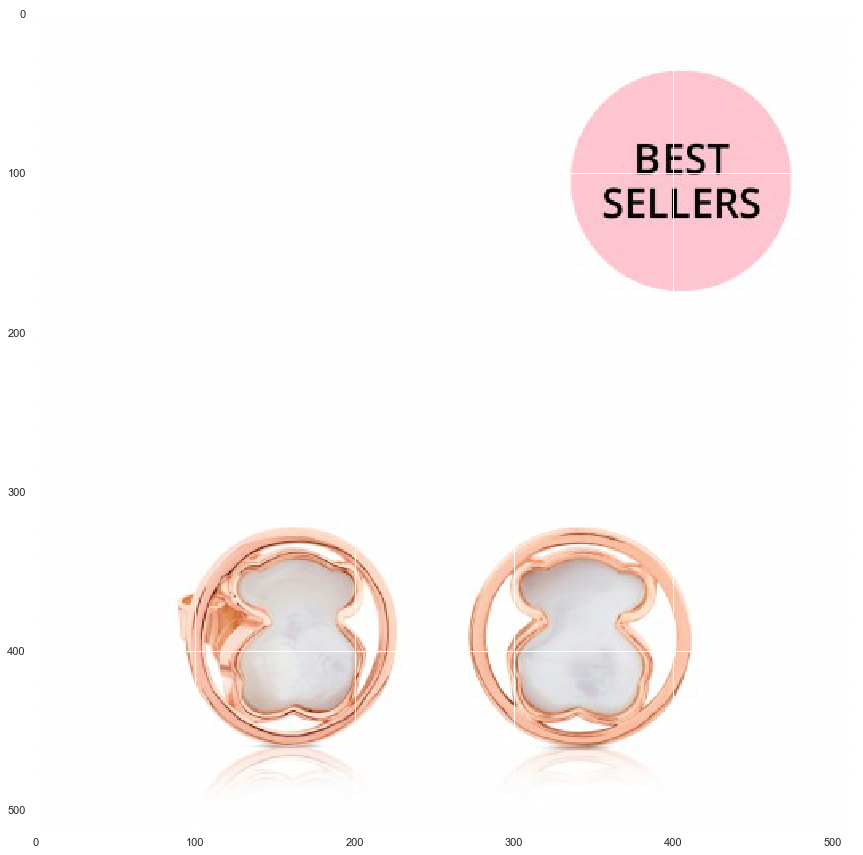

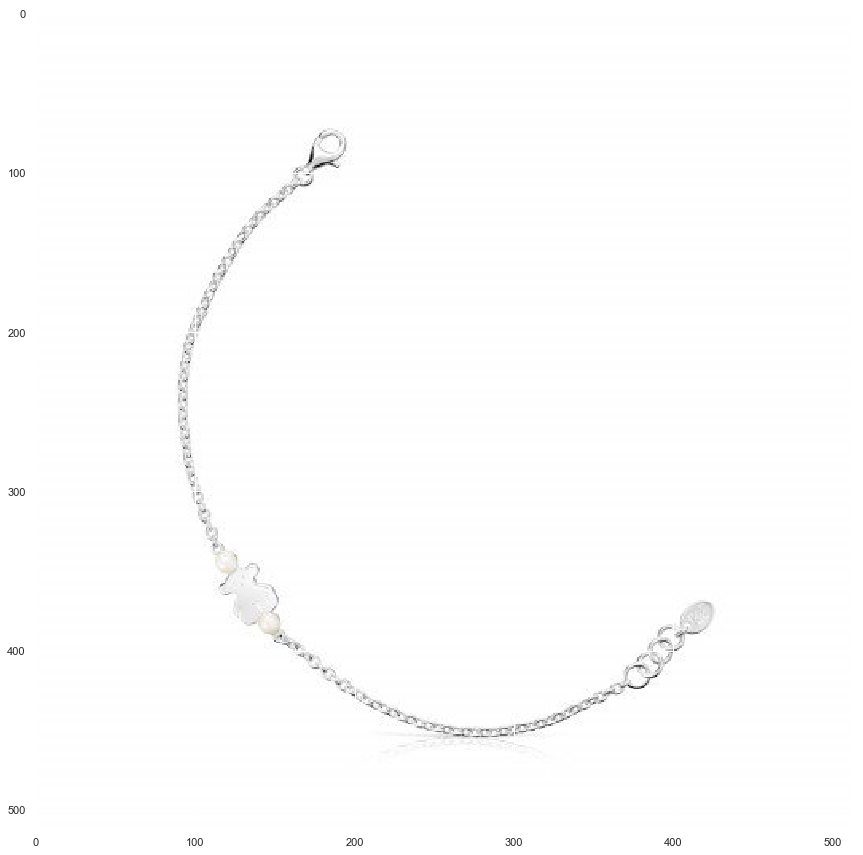

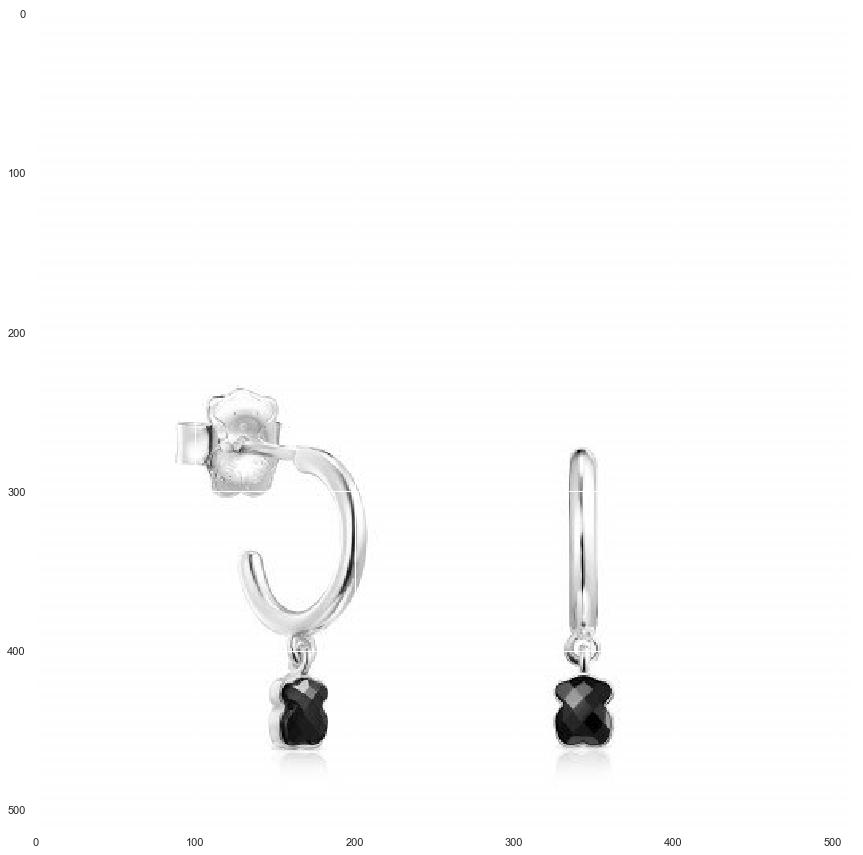

In [189]:
from PIL import Image
import requests
from io import BytesIO

img_response_data = []

for i in images.items():
    x = i[0].replace('[','').replace(']','').replace('\'','').replace('\'','')
    print(x)
    url= x
    
    response = requests.get(url)
#     img = Image.open(BytesIO(response.content))
    img_response_data.append(BytesIO(response.content))
#     imgplot = plt.imshow(img)
for i in range(len(img_response_data)): 
    try:
        img = Image.open(img_response_data[i])
        imgplot = plt.imshow(img)
        plt.show()
    except Exception as ex:
        print(ex)